In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("Fast Food Sales1.csv")
from sklearn.model_selection import train_test_split

# Assume 'item_type' is the target column and 'item_price', 'quantity' are feature columns
X = data[['item_price', 'quantity']]
y = data['item_type']

# Encode the target labels if they are not numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Test accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


Confusion Matrix:
 [[ 88   0]
 [  0 212]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


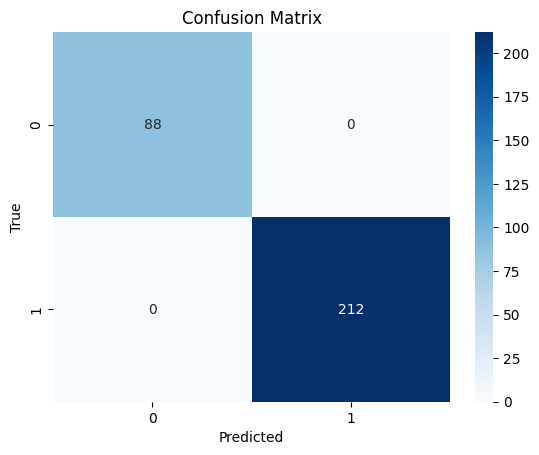

In [ ]:
# Predict and evaluate
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Assume 'item_price' is the feature and 'transaction_amount' is the target column for regression
X_train = data[['item_price']]
y_train = data['transaction_amount']

# Train linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)


MSE: 24789.844270480997
RMSE: 157.44790970502274
MAPE: 1.1074083656005096
R2 Score: 0.4060719044900075


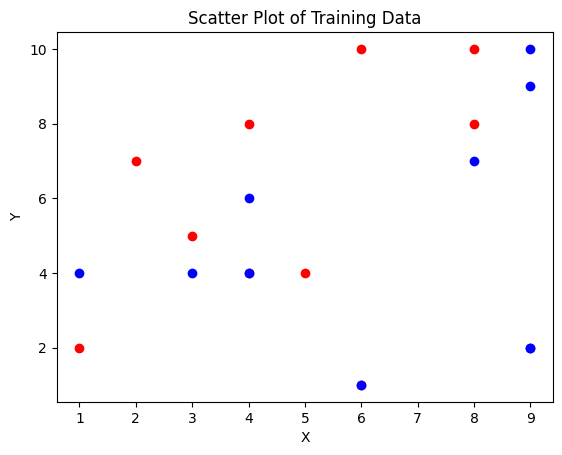

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating 20 random data points
np.random.seed(0)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.choice([0, 1], size=20)

# Scatter plot
for i in range(len(y_train)):
    if y_train[i] == 0:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='blue')
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.show()


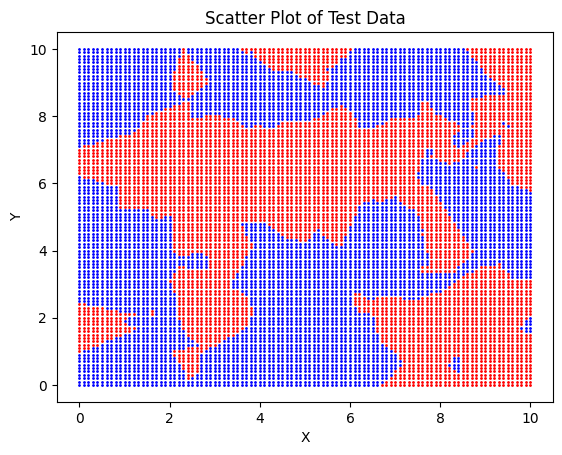

In [ ]:
# Generate test set
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

# Train kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict test set
y_test_pred = knn.predict(X_test)

# Scatter plot of test data
for i in range(len(y_test_pred)):
    if y_test_pred[i] == 0:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', s=1)
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', s=1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data')
plt.show()


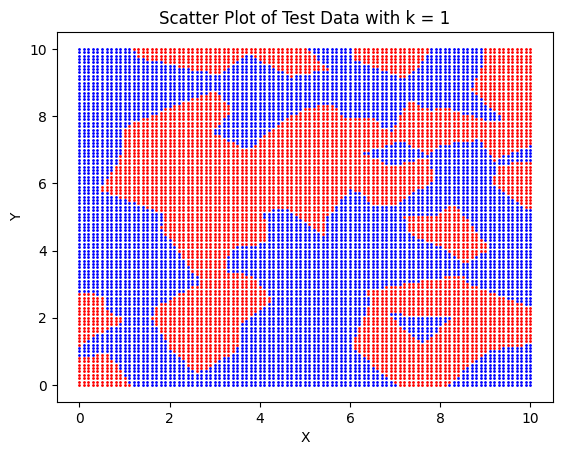

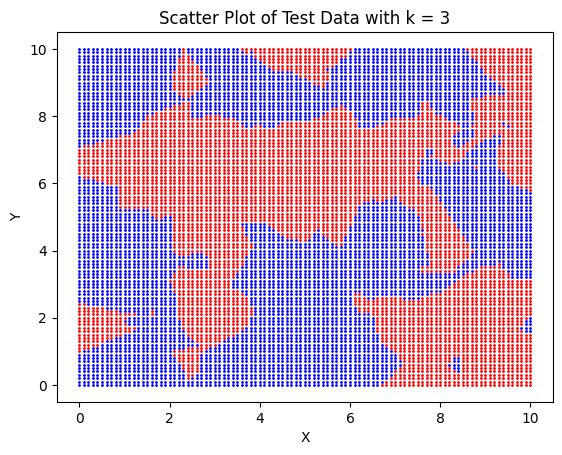

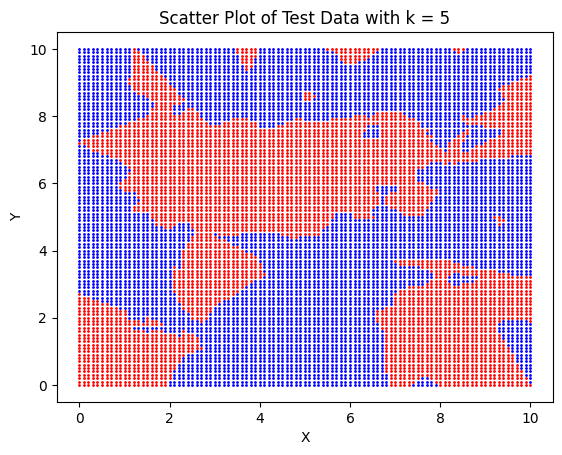

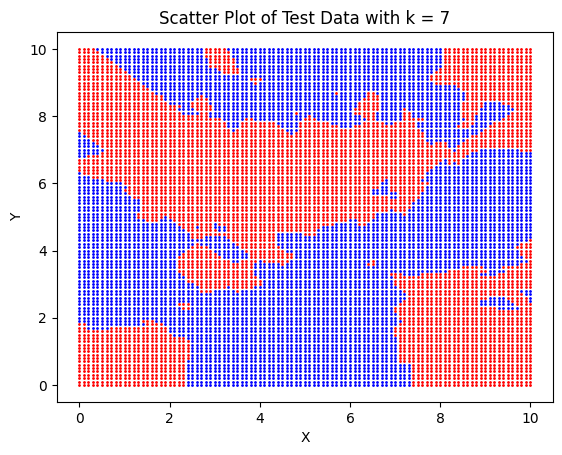

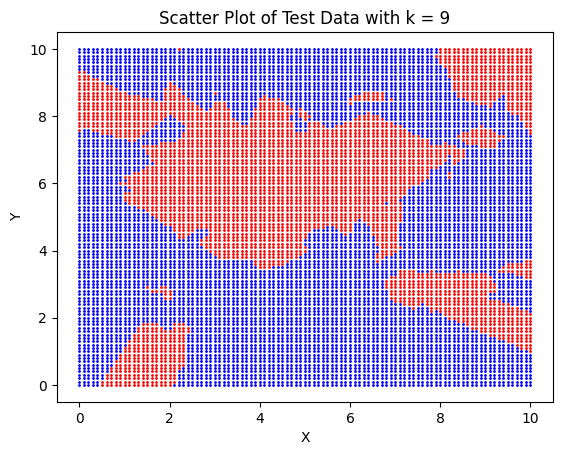

In [ ]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    plt.figure()
    for i in range(len(y_test_pred)):
        if y_test_pred[i] == 0:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', s=1)
        else:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='red', s=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter Plot of Test Data with k = {k}')
    plt.show()
